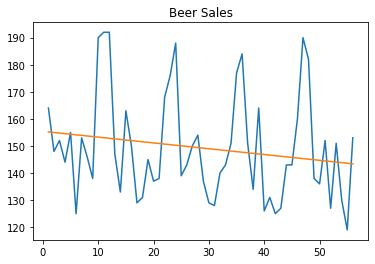

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#1.加载数据和可视化检查
file = r'data_set/beer.txt'
df = pd.read_csv(file)
X = np.linspace(1, len(df), len(df))
y = df['Sales']
X = np.reshape(X, (len(df), 1))

lm = LinearRegression()
lm.fit(X, y)
trend = lm.predict(X)

plt.figure()
plt.plot(X, y)
plt.plot(X, trend)
plt.title('Beer Sales')
plt.show()

In [70]:
#2. 啤酒销量和当年月份的回归
# 我们需要把线性指数月份（0－56）转换成一年中的月份（0－11）
months = []
for n in range(len(df)):
    mod = n % 12
    months.append(mod)

print(months)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7]


In [71]:
#2.1 哑变量矩阵（dummy matrix）转换
# 我们使用pd.get_dummies()函数，把分类变量月份转换为哑变量矩阵（dummy matrix）
dummy_months = pd.get_dummies(months, drop_first=True)
print(dummy_months)

    1   2   3   4   5   6   7   8   9   10  11
0    0   0   0   0   0   0   0   0   0   0   0
1    1   0   0   0   0   0   0   0   0   0   0
2    0   1   0   0   0   0   0   0   0   0   0
3    0   0   1   0   0   0   0   0   0   0   0
4    0   0   0   1   0   0   0   0   0   0   0
5    0   0   0   0   1   0   0   0   0   0   0
6    0   0   0   0   0   1   0   0   0   0   0
7    0   0   0   0   0   0   1   0   0   0   0
8    0   0   0   0   0   0   0   1   0   0   0
9    0   0   0   0   0   0   0   0   1   0   0
10   0   0   0   0   0   0   0   0   0   1   0
11   0   0   0   0   0   0   0   0   0   0   1
12   0   0   0   0   0   0   0   0   0   0   0
13   1   0   0   0   0   0   0   0   0   0   0
14   0   1   0   0   0   0   0   0   0   0   0
15   0   0   1   0   0   0   0   0   0   0   0
16   0   0   0   1   0   0   0   0   0   0   0
17   0   0   0   0   1   0   0   0   0   0   0
18   0   0   0   0   0   1   0   0   0   0   0
19   0   0   0   0   0   0   1   0   0   0   0
20   0   0   

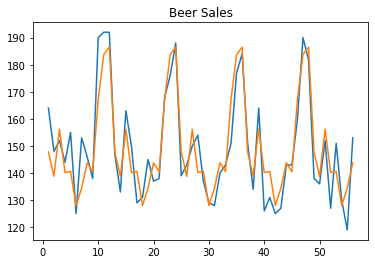

In [72]:
#接下来，让我们来完成啤酒销量和当年月份的回归，语句如下：
lm.fit(dummy_months, y)
Ypred = lm.predict(dummy_months)

#最后，我们绘制出这次预测的结果：
plt.figure()
plt.plot(X, y)
plt.plot(X, Ypred)
plt.title('Beer Sales')
plt.show()

In [73]:
#3. 评估预测因子

#3.1 numpy.hstack函数
#我们的两个预测因子是：线性时间索引和月年虚拟变量
#首先合并这两个因子，在这里我们使用的是numpy中的hstack函数
#这个函数把X和dummy_months两个变量数组堆叠起来：
X_multi = np.hstack((X, dummy_months))
print(X_multi)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 6.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 7.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 8.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 9.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [14.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [15.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [16.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [17.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [18.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [19.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  

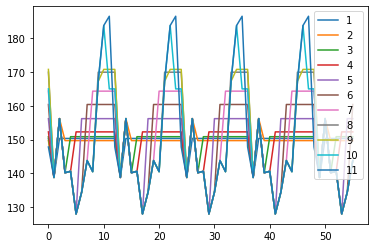

In [74]:
#3.2 迭代组合预测因子
#下面这串相对复杂的代码，其实就是使用for循环迭代依次得到原来数组X_multi中的第2列到第i+1列
#然后重新整理形状成56行Xi列的数组，再用这个数组和真实值y的数组，进行线性回归
cv_scores = []
plt.figure()
for i in range(1, 12):
    #e.g.需要依次得到原来数组X_multi中的第2列到第i+1列，
    lm.fit(np.resize(X_multi[:, 1:i + 1], (56, i)), y)  # 对i进行线性回归拟合
    cv_scores.append(
        lm.score(np.resize(X_multi[:, 1:i + 1], (56, i)),
                 y)  # 依次将i拟合的R方传入列表cv_scores
    )
    plt.plot(lm.predict(X_multi[:, 1:i + 1]), label='{0}'.format(i))
    plt.legend()

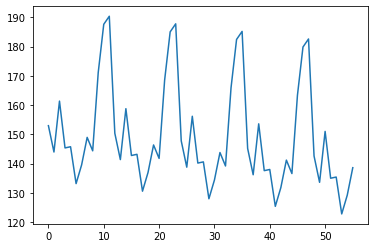

In [86]:
#4. 绘制预测区间
lm.fit(X_multi, y)
predicted = lm.predict(X_multi)
plt.figure()
plt.plot(predicted)
plt.show()

In [84]:
sse = np.sum(np.power(y - predicted, 2), axis=0)
print('sse', sse)
N = len(df)
k = len(X_multi[0])
s_e = np.sqrt((1 / (N - k - 1)) * sse)
print('s_e', s_e)
sx2 = np.var(X_multi)
print('sx2', sx2)
mean_centered = X_multi - np.mean(X_multi, axis=0)
print(mean_centered)

sse 3461.090000000001
s_e 8.971647848432255
sx2 83.52735039328233
[[-27.5         -0.08928571  -0.08928571  -0.08928571  -0.08928571
   -0.08928571  -0.08928571  -0.08928571  -0.07142857  -0.07142857
   -0.07142857  -0.07142857]
 [-26.5          0.91071429  -0.08928571  -0.08928571  -0.08928571
   -0.08928571  -0.08928571  -0.08928571  -0.07142857  -0.07142857
   -0.07142857  -0.07142857]
 [-25.5         -0.08928571   0.91071429  -0.08928571  -0.08928571
   -0.08928571  -0.08928571  -0.08928571  -0.07142857  -0.07142857
   -0.07142857  -0.07142857]
 [-24.5         -0.08928571  -0.08928571   0.91071429  -0.08928571
   -0.08928571  -0.08928571  -0.08928571  -0.07142857  -0.07142857
   -0.07142857  -0.07142857]
 [-23.5         -0.08928571  -0.08928571  -0.08928571   0.91071429
   -0.08928571  -0.08928571  -0.08928571  -0.07142857  -0.07142857
   -0.07142857  -0.07142857]
 [-22.5         -0.08928571  -0.08928571  -0.08928571  -0.08928571
    0.91071429  -0.08928571  -0.08928571  -0.0714285

In [85]:
print(np.dot(mean_centered, mean_centered.T))
print(np.diag(np.dot(mean_centered, mean_centered.T)))

[[ 756.32621173  728.73692602  701.23692602 ... -701.26307398
  -728.76307398 -756.26307398]
 [ 728.73692602  703.14764031  675.64764031 ... -675.85235969
  -702.35235969 -728.85235969]
 [ 701.23692602  675.64764031  651.14764031 ... -650.35235969
  -675.85235969 -701.35235969]
 ...
 [-701.26307398 -675.85235969 -650.35235969 ...  651.14764031
   675.64764031  701.14764031]
 [-728.76307398 -702.35235969 -675.85235969 ...  675.64764031
   703.14764031  728.64764031]
 [-756.26307398 -728.85235969 -701.35235969 ...  701.14764031
   728.64764031  757.14764031]]
[756.32621173 703.14764031 651.14764031 601.14764031 553.14764031
 507.14764031 463.14764031 421.14764031 381.18335459 343.18335459
 307.18335459 273.18335459 240.32621173 211.14764031 183.14764031
 157.14764031 133.14764031 111.14764031  91.14764031  73.14764031
  57.18335459  43.18335459  31.18335459  21.18335459  12.32621173
   7.14764031   3.14764031   1.14764031   1.14764031   3.14764031
   7.14764031  13.14764031  21.18335459 

In [76]:
# 可能有问题
forecast_var95 = 1.96 * s_e * np.sqrt(1 + (
    1 / 56) + np.diag(np.dot(mean_centered, mean_centered.T)) / ((N - 1) * sx2))
forecast_var95 = np.reshape(forecast_var95, (56, 1))
upper = predicted + forecast_var95
lower = predicted - forecast_var95

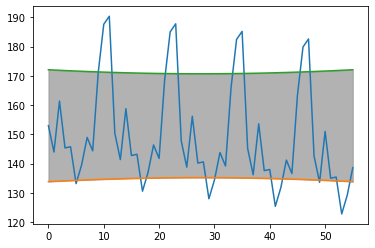

In [82]:
plt.figure()
plt.plot(predicted)
plt.plot(lower[:, 0])
plt.plot(upper[:, 0])
plt.fill_between(np.linspace(0, 55, 56),
                 lower[:, 0],
                 upper[:, 0],
                 color='grey',
                 alpha=0.6)
plt.show()

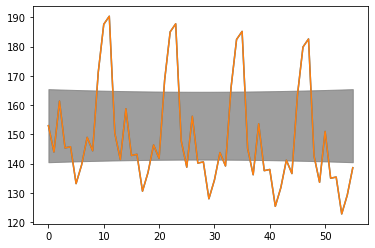

In [87]:
#5. 绘制更紧凑范围的预测区间
forecast_var80 = 1.28 * s_e * np.sqrt(1 + (
    1 / 56) + np.diag(np.dot(mean_centered, mean_centered.T)) / ((N - 1) * sx2))
forecast_var80 = np.reshape(forecast_var80, (56, 1))
upper = predicted + forecast_var80
lower = predicted - forecast_var80
plt.plot(predicted)
plt.fill_between(np.linspace(0, 55, 56),
                 lower[:, 0],
                 upper[:, 0],
                 color='grey',
                 alpha='0.7')

plt.plot(predicted)
plt.fill_between(np.linspace(0, 55, 56),
                 lower[:, 0],
                 upper[:, 0],
                 color='grey',
                 alpha='0.2')